Features used: 23 Categorical, 13 Continuous
Starting training with LR = 0.009...


epoch,train_loss,valid_loss,accuracy,time
0,0.669228,0.670772,0.584750,00:12
1,0.659317,0.661746,0.601450,00:12
2,0.666654,0.662606,0.599750,00:12
3,0.657624,0.660811,0.602750,00:12
4,0.660809,0.662222,0.603150,00:12
5,0.656835,0.663703,0.594650,00:12
6,0.651326,0.666169,0.593500,00:12
7,0.640654,0.669910,0.594000,00:12
8,0.644152,0.670884,0.588250,00:12
9,0.645144,0.670464,0.588450,00:12



--- Final Model Performance ---


Final Accuracy: 0.5885


,Gender,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Login_Frequency,Discussion_Participation,Notifications_Checked,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Rewatch_Count,Payment_Mode,Fee_Paid,Discount_Used,Reminder_Emails_Clicked,Support_Tickets_Raised,Age,Instructor_Rating,Average_Session_Duration_Min,Video_Completion_Rate,Time_Spent_Hours,Days_Since_Last_Login,Peer_Interaction_Score,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Payment_Amount,App_Usage_Percentage,Satisfaction_Rating,Completed,Completed_pred
0,1.0,1.0,1.0,10.0,2.0,2.0,6.0,5.0,5.0,1.0,8.0,6.0,3.0,4.0,3.0,9.0,4.0,2.0,6.0,2.0,1.0,5.0,2.0,0.591403,0.766291,0.786376,0.105889,-0.231634,-0.170452,-1.817774,-0.038847,0.326526,-1.255677,1.551500,-0.360209,0.808951,0.0,1.0
1,2.0,1.0,1.0,12.0,1.0,1.0,3.0,4.0,5.0,3.0,7.0,4.0,4.0,5.0,3.0,9.0,2.0,2.0,1.0,2.0,2.0,5.0,2.0,-0.300295,0.272368,-1.730522,1.298089,-0.549470,0.259955,-1.261412,1.054129,-0.117282,-0.632423,0.888563,0.423048,-0.046752,1.0,1.0
2,1.0,4.0,4.0,5.0,1.0,1.0,1.0,6.0,5.0,2.0,4.0,6.0,1.0,7.0,7.0,5.0,3.0,2.0,6.0,2.0,1.0,1.0,2.0,1.483102,0.766291,2.141628,-0.011796,0.668899,-0.313921,0.559408,-0.764839,-2.179683,0.446285,0.447564,-1.300117,0.523717,0.0,0.0
3,1.0,1.0,3.0,1.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,7.0,6.0,4.0,9.0,3.0,7.0,4.0,6.0,2.0,1.0,5.0,1.0,-0.835314,-0.715477,-0.472073,1.252038,-0.893791,-0.744327,0.964035,-0.349986,1.057503,2.292073,0.164749,-0.360209,1.236803,1.0,0.0
4,2.0,1.0,3.0,3.0,2.0,1.0,7.0,7.0,4.0,3.0,5.0,3.0,3.0,8.0,3.0,9.0,7.0,3.0,4.0,2.0,1.0,3.0,1.0,0.413064,-1.209402,0.883179,0.075189,-0.178662,-0.600858,-0.098111,1.835966,-1.605344,-1.391514,0.524260,1.624042,0.666334,0.0,1.0
5,2.0,1.0,1.0,15.0,2.0,3.0,8.0,3.0,1.0,2.0,1.0,5.0,3.0,10.0,5.0,7.0,5.0,5.0,6.0,2.0,1.0,3.0,2.0,1.126422,-1.703325,-0.278466,1.062719,-0.125689,0.116486,-2.020087,-0.270207,-0.548037,0.174610,0.046351,0.527482,-0.189369,1.0,0.0
6,2.0,1.0,3.0,2.0,2.0,3.0,1.0,6.0,5.0,2.0,4.0,8.0,3.0,3.0,7.0,5.0,4.0,3.0,3.0,1.0,1.0,9.0,1.0,0.234724,0.766291,0.302357,-0.646271,-0.602442,0.546893,-1.059099,1.804054,0.587589,0.270495,-1.558502,0.370831,0.095866,1.0,1.0
7,2.0,1.0,1.0,15.0,2.0,1.0,6.0,5.0,5.0,1.0,8.0,7.0,3.0,3.0,7.0,5.0,4.0,1.0,6.0,2.0,1.0,3.0,2.0,1.304762,0.766291,0.592768,0.689197,2.681856,-0.887796,-0.755629,0.822769,-0.352239,0.941691,1.550062,1.154088,0.666334,0.0,0.0
8,1.0,1.0,1.0,10.0,2.0,1.0,1.0,6.0,5.0,2.0,4.0,7.0,3.0,5.0,3.0,9.0,2.0,1.0,3.0,1.0,2.0,3.0,1.0,0.234724,0.766291,-1.633718,0.080306,-0.417038,-0.457390,-0.553316,-1.514764,-0.123809,-1.295629,-1.558502,-0.099123,-1.330306,1.0,1.0


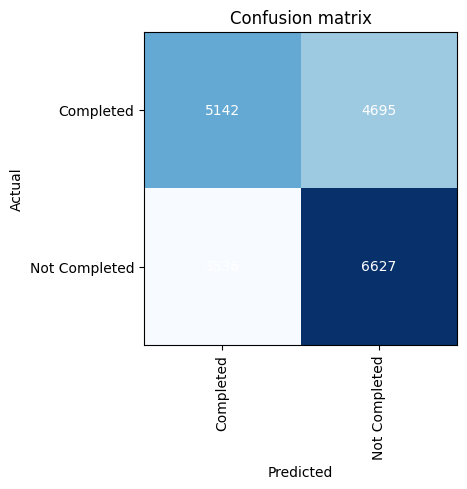

Model was trained on: ['Gender', 'Education_Level', 'Employment_Status', 'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_ID', 'Course_Name', 'Category', 'Course_Level', 'Course_Duration_Days', 'Login_Frequency', 'Discussion_Participation', 'Notifications_Checked', 'Assignments_Submitted', 'Assignments_Missed', 'Quiz_Attempts', 'Rewatch_Count', 'Payment_Mode', 'Fee_Paid', 'Discount_Used', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Age', 'Instructor_Rating', 'Average_Session_Duration_Min', 'Video_Completion_Rate', 'Time_Spent_Hours', 'Days_Since_Last_Login', 'Peer_Interaction_Score', 'Quiz_Score_Avg', 'Project_Grade', 'Progress_Percentage', 'Payment_Amount', 'App_Usage_Percentage', 'Satisfaction_Rating']


In [ ]:
import pandas as pd
from fastai.tabular.all import *
import matplotlib.pyplot as plt

file_path = r"C:\Users\MASTER\OneDrive\Desktop\projects for master\When Simple Models Beat Deep Models A Practical ML Study\data\Course_Completion_Prediction.csv"
df = pd.read_csv(file_path)

df.columns = [c.strip() for c in df.columns]

y_names = 'Completed'

cont_names, cat_names = cont_cat_split(df, max_card=20, dep_var=y_names)

ignored_cols = ['Student_ID', 'Name', 'Enrollment_Date']
cat_names = [c for c in cat_names if c not in ignored_cols]
cont_names = [c for c in cont_names if c not in ignored_cols]

print(f"Features used: {len(cat_names)} Categorical, {len(cont_names)} Continuous")

procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

to = TabularPandas(df, procs=procs, 
                    cat_names=cat_names, 
                    cont_names=cont_names,
                    y_names=y_names, 
                    y_block=CategoryBlock(), 
                    splits=splits)

dls = to.dataloaders(bs=64)

learn = tabular_learner(dls, layers=[200, 100], metrics=accuracy)

print("Starting training with LR = 0.009...")
learn.fit_one_cycle(10, 0.009)

print("\n--- Final Model Performance ---")
results = learn.validate()
print(f"Final Accuracy: {results[1]:.4f}")

learn.show_results()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.show()

def plot_feature_importance(m, df_train):
    print(f"Model was trained on: {cat_names + cont_names}")

plot_feature_importance(learn, to.train.xs)